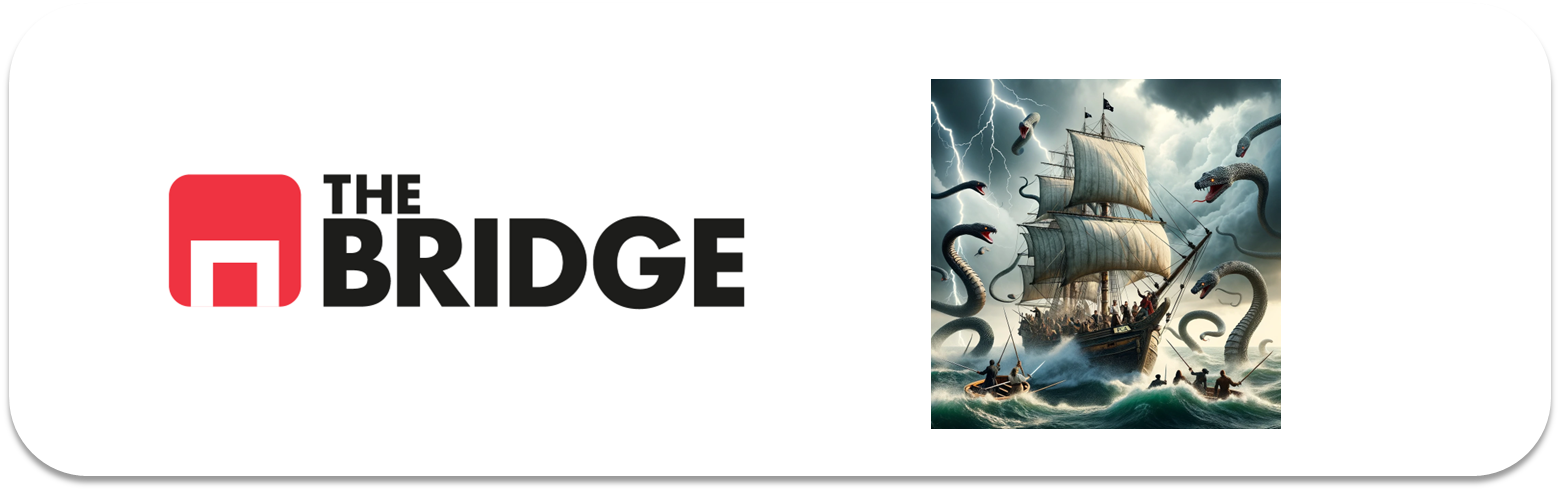

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./data/credit_npo.csv")
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

In [4]:
df.dropna(inplace = True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [5]:
target = "SeriousDlqin2yrs"

In [9]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state= 42)

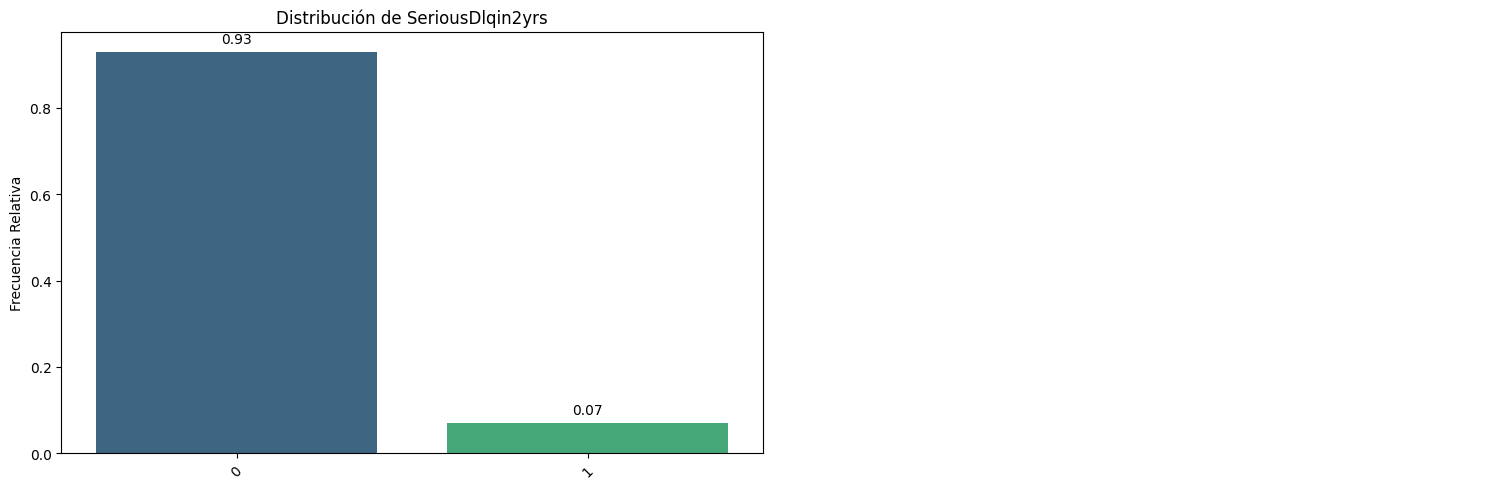

In [10]:
bt.pinta_distribucion_categoricas(train_set, [target], True, True)

La regla no escrita dice que si tiene representación superior al 10% se dejaría

In [ ]:
train_set["NumberOfTime30-59DaysPastDueNotWorse"].value_counts(True)

NumberOfTime30-59DaysPastDueNotWorse
0     0.831147
1     0.113521
2     0.033644
3     0.010897
4     0.005607
5     0.002116
6     0.001904
98    0.000846
8     0.000212
7     0.000106
Name: proportion, dtype: float64

In [18]:
train_set["NumberOfTime30-59DaysPastDueNotWorse"] = (train_set["NumberOfTime30-59DaysPastDueNotWorse"] > 0).astype(int)
test_set["NumberOfTime30-59DaysPastDueNotWorse"] = (test_set["NumberOfTime30-59DaysPastDueNotWorse"] > 0).astype(int)
train_set["NumberOfTime30-59DaysPastDueNotWorse"].value_counts(True)

NumberOfTime30-59DaysPastDueNotWorse
0    0.831147
1    0.168853
Name: proportion, dtype: float64

Esta feature se descartará

In [20]:
train_set["NumberOfOpenCreditLinesAndLoans"].value_counts(True)
train_set["NumberOfOpenCreditLinesAndLoans"] = (train_set["NumberOfOpenCreditLinesAndLoans"] > 0).astype(int)
test_set["NumberOfOpenCreditLinesAndLoans"] = (test_set["NumberOfOpenCreditLinesAndLoans"] > 0).astype(int)
train_set["NumberOfOpenCreditLinesAndLoans"].value_counts(True)


NumberOfOpenCreditLinesAndLoans
1    0.990796
0    0.009204
Name: proportion, dtype: float64

In [21]:
train_set["NumberOfTimes90DaysLate"].value_counts(True)


NumberOfTimes90DaysLate
0     0.943610
1     0.033115
2     0.012590
3     0.004655
4     0.002751
5     0.001481
98    0.000846
6     0.000529
7     0.000212
9     0.000106
10    0.000106
Name: proportion, dtype: float64

In [22]:
train_set["NumberOfTimes90DaysLate"].value_counts(True)
train_set["NumberOfTimes90DaysLate"] = (train_set["NumberOfTimes90DaysLate"] > 0).astype(int)
test_set["NumberOfTimes90DaysLate"] = (test_set["NumberOfTimes90DaysLate"] > 0).astype(int)
train_set["NumberOfTimes90DaysLate"].value_counts(True)


NumberOfTimes90DaysLate
0    0.94361
1    0.05639
Name: proportion, dtype: float64

In [23]:
train_set["NumberRealEstateLoansOrLines"].value_counts(True)

NumberRealEstateLoansOrLines
0     0.355057
1     0.352730
2     0.221646
3     0.043694
4     0.014494
5     0.007088
6     0.002010
8     0.000846
7     0.000846
11    0.000317
9     0.000317
12    0.000317
16    0.000212
10    0.000212
13    0.000106
19    0.000106
Name: proportion, dtype: float64

In [29]:
train_set["NumberRealEstateLoansOrLines"] = pd.cut(train_set["NumberRealEstateLoansOrLines"], bins = [-1,0,1,100], labels = [0,1,2], right= True).astype(int) 
test_set["NumberRealEstateLoansOrLines"] = pd.cut(test_set["NumberRealEstateLoansOrLines"], bins = [-1,0,1,100], labels = [0,1,2], right= True).astype(int) 
train_set["NumberRealEstateLoansOrLines"].value_counts(True)

NumberRealEstateLoansOrLines
0    0.355057
1    0.352730
2    0.292213
Name: proportion, dtype: float64

In [31]:
train_set["NumberOfTime60-89DaysPastDueNotWorse"] = (train_set["NumberOfTime60-89DaysPastDueNotWorse"] > 0).astype(int)
test_set["NumberOfTime60-89DaysPastDueNotWorse"] = (test_set["NumberOfTime60-89DaysPastDueNotWorse"] > 0).astype(int)
train_set["NumberOfTime60-89DaysPastDueNotWorse"].value_counts(True)
train_set["NumberOfTime60-89DaysPastDueNotWorse"].value_counts(True)

NumberOfTime60-89DaysPastDueNotWorse
0    0.947207
1    0.052793
Name: proportion, dtype: float64

In [32]:
train_set["NumberOfDependents"] = (train_set["NumberOfDependents"] > 0).astype(int)
test_set["NumberOfDependents"] = (test_set["NumberOfDependents"] > 0).astype(int)
train_set["NumberOfDependents"].value_counts(True)
train_set["NumberOfDependents"].value_counts(True)


NumberOfDependents
0    0.542213
1    0.457787
Name: proportion, dtype: float64

    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.


In [35]:
# Obtén los tipos de datos de cada columna
tipos_de_datos = train_set.dtypes
col_num = []
col_cat = []
# Itera sobre cada columna y clasifícala como numérica o categórica
for columna, tipo in tipos_de_datos.items():
    if pd.api.types.is_numeric_dtype(tipo):
        col_num.append(columna)
    else:
        col_cat.append(columna)
# Imprime las listas de columnas categóricas y numéricas
print(f'Numéricas: {col_num}')
print(f'Categóricas: {col_cat}')


Numéricas: ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
Categóricas: []


In [ ]:
# Añadir de toolbox tipifica variables para categorizar si son numericas discretas, continuas o categoricas.

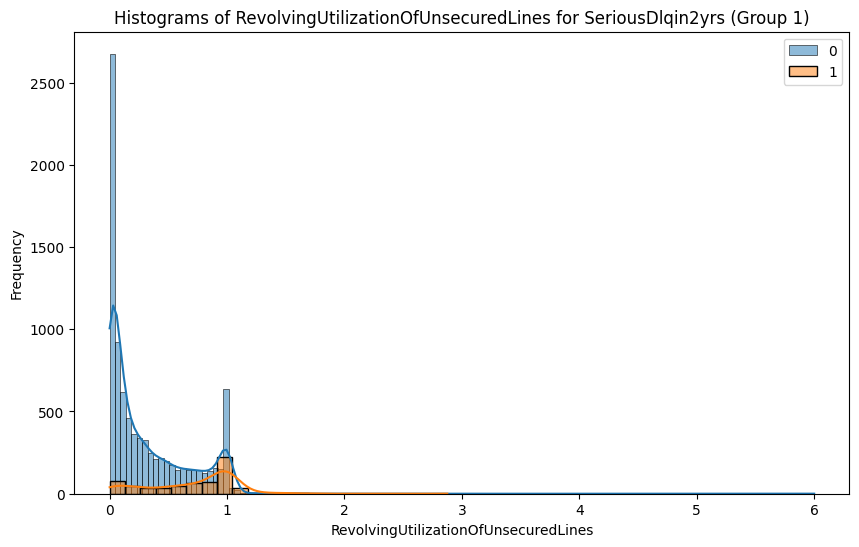

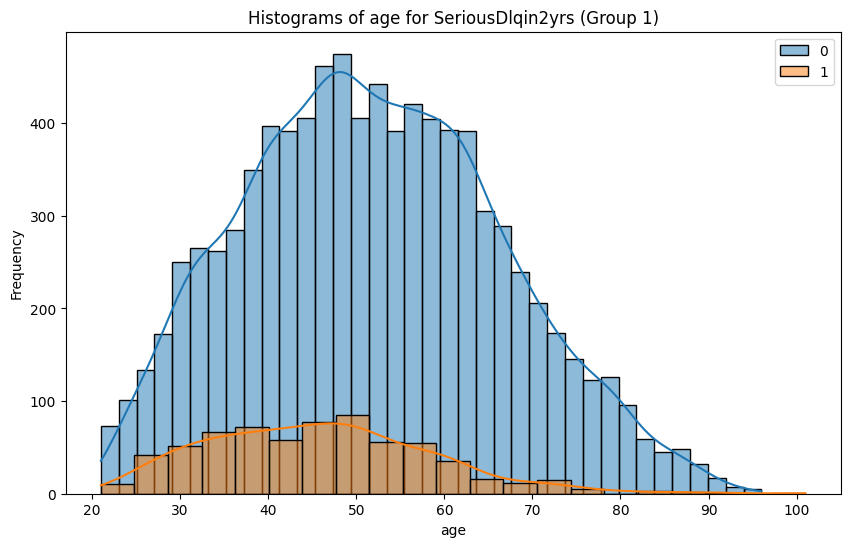

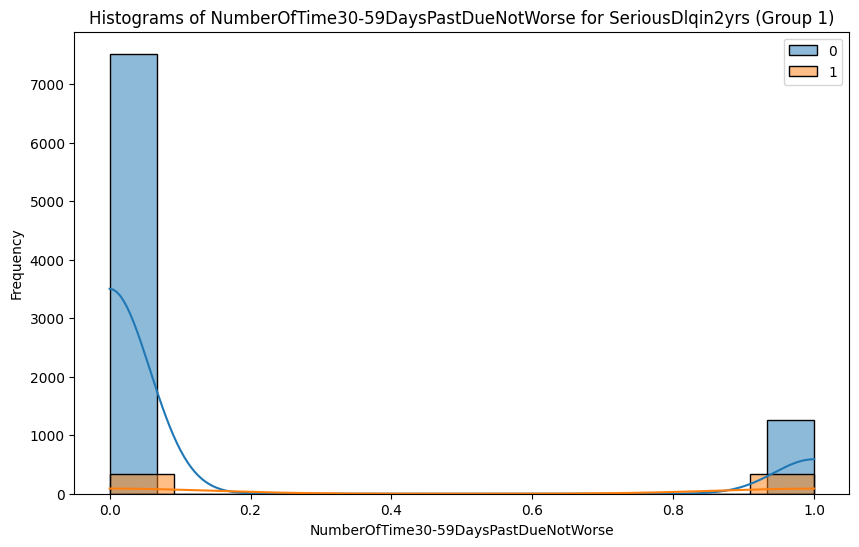

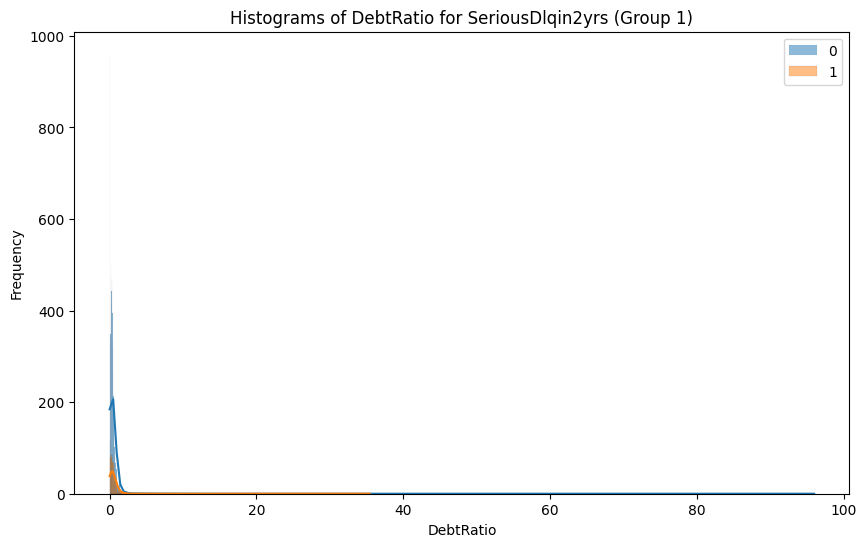

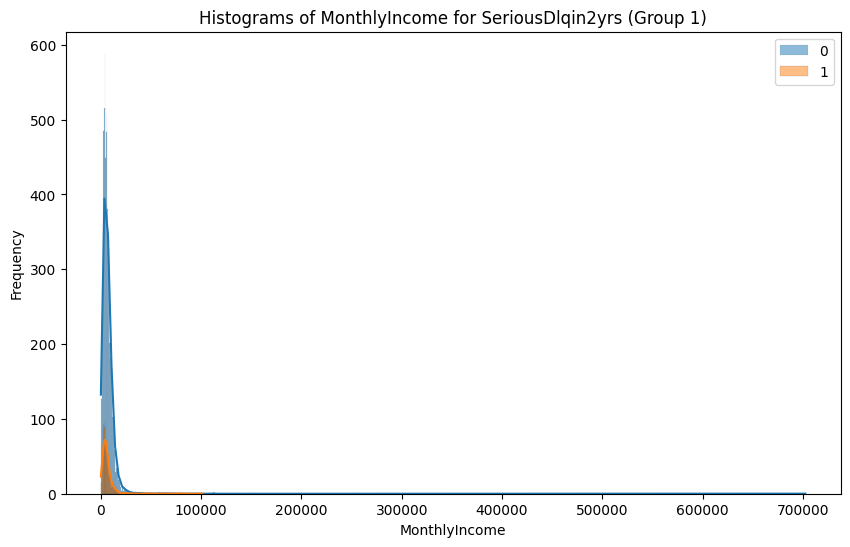

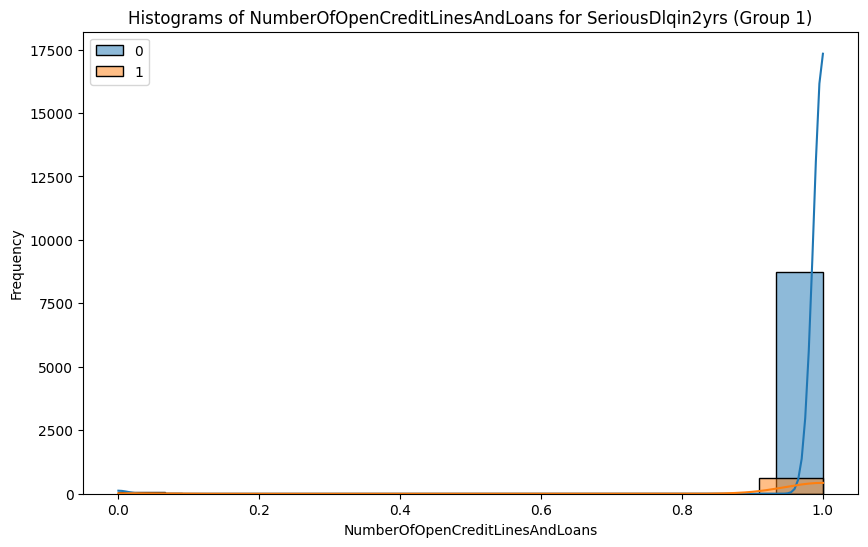

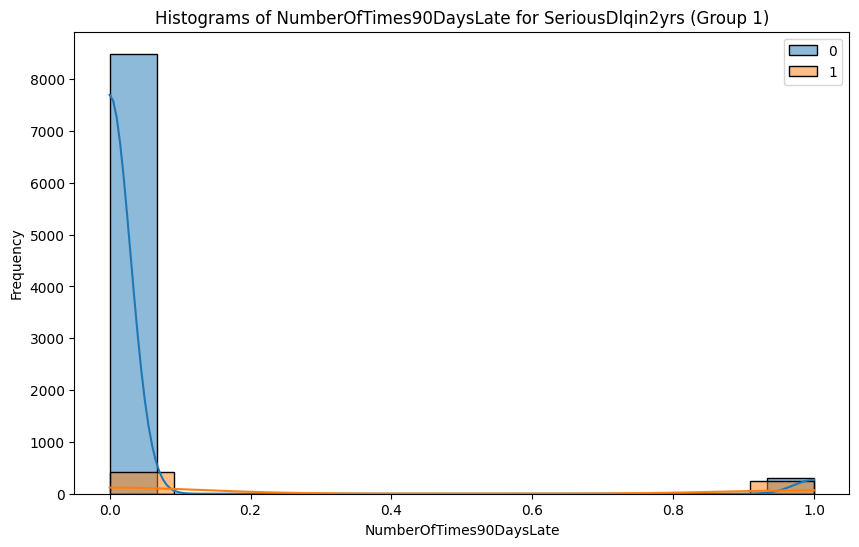

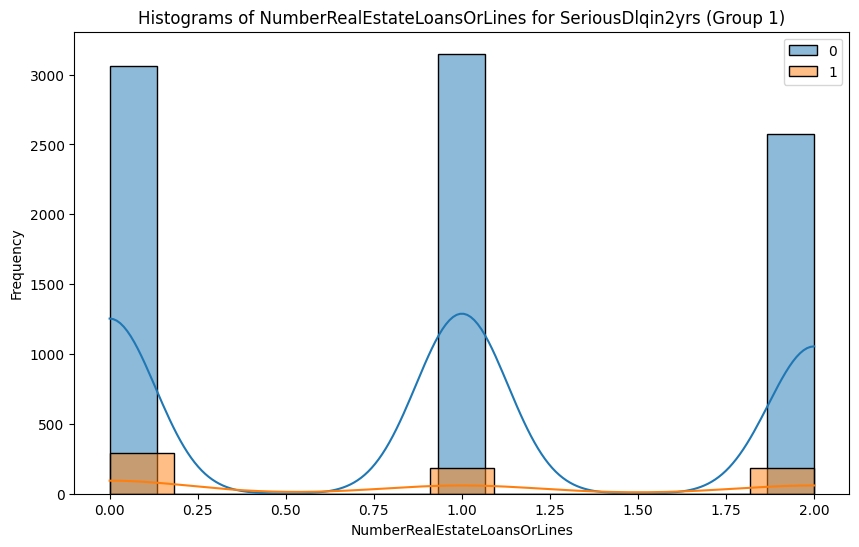

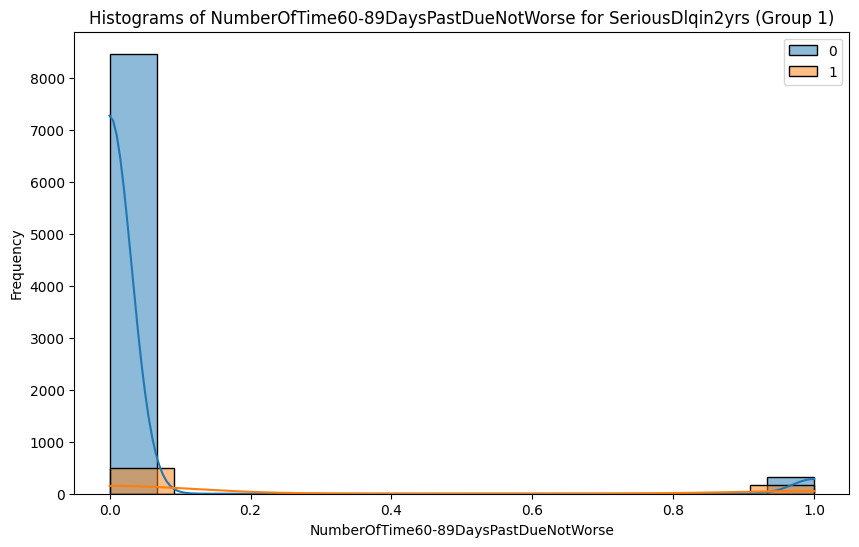

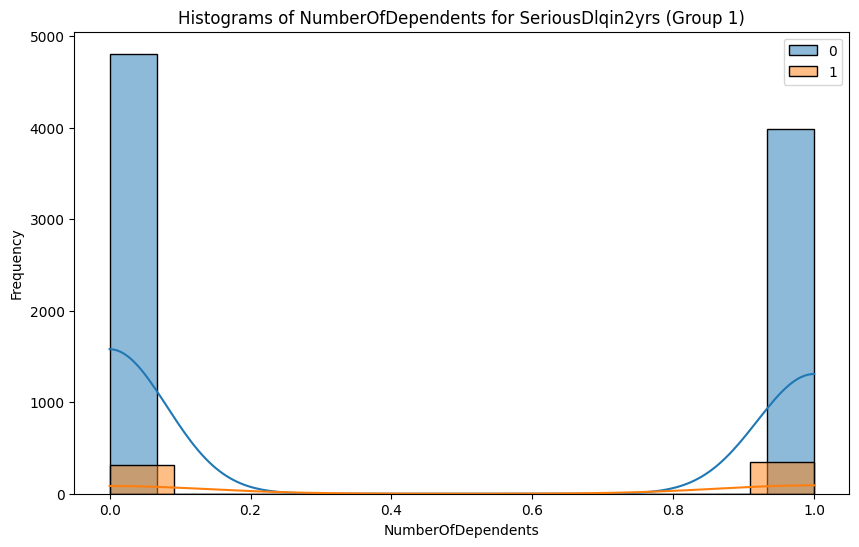

In [37]:
for col in train_set.columns:
    if col != target:
        bt.plot_grouped_histograms(train_set, target, col, group_size = 2)

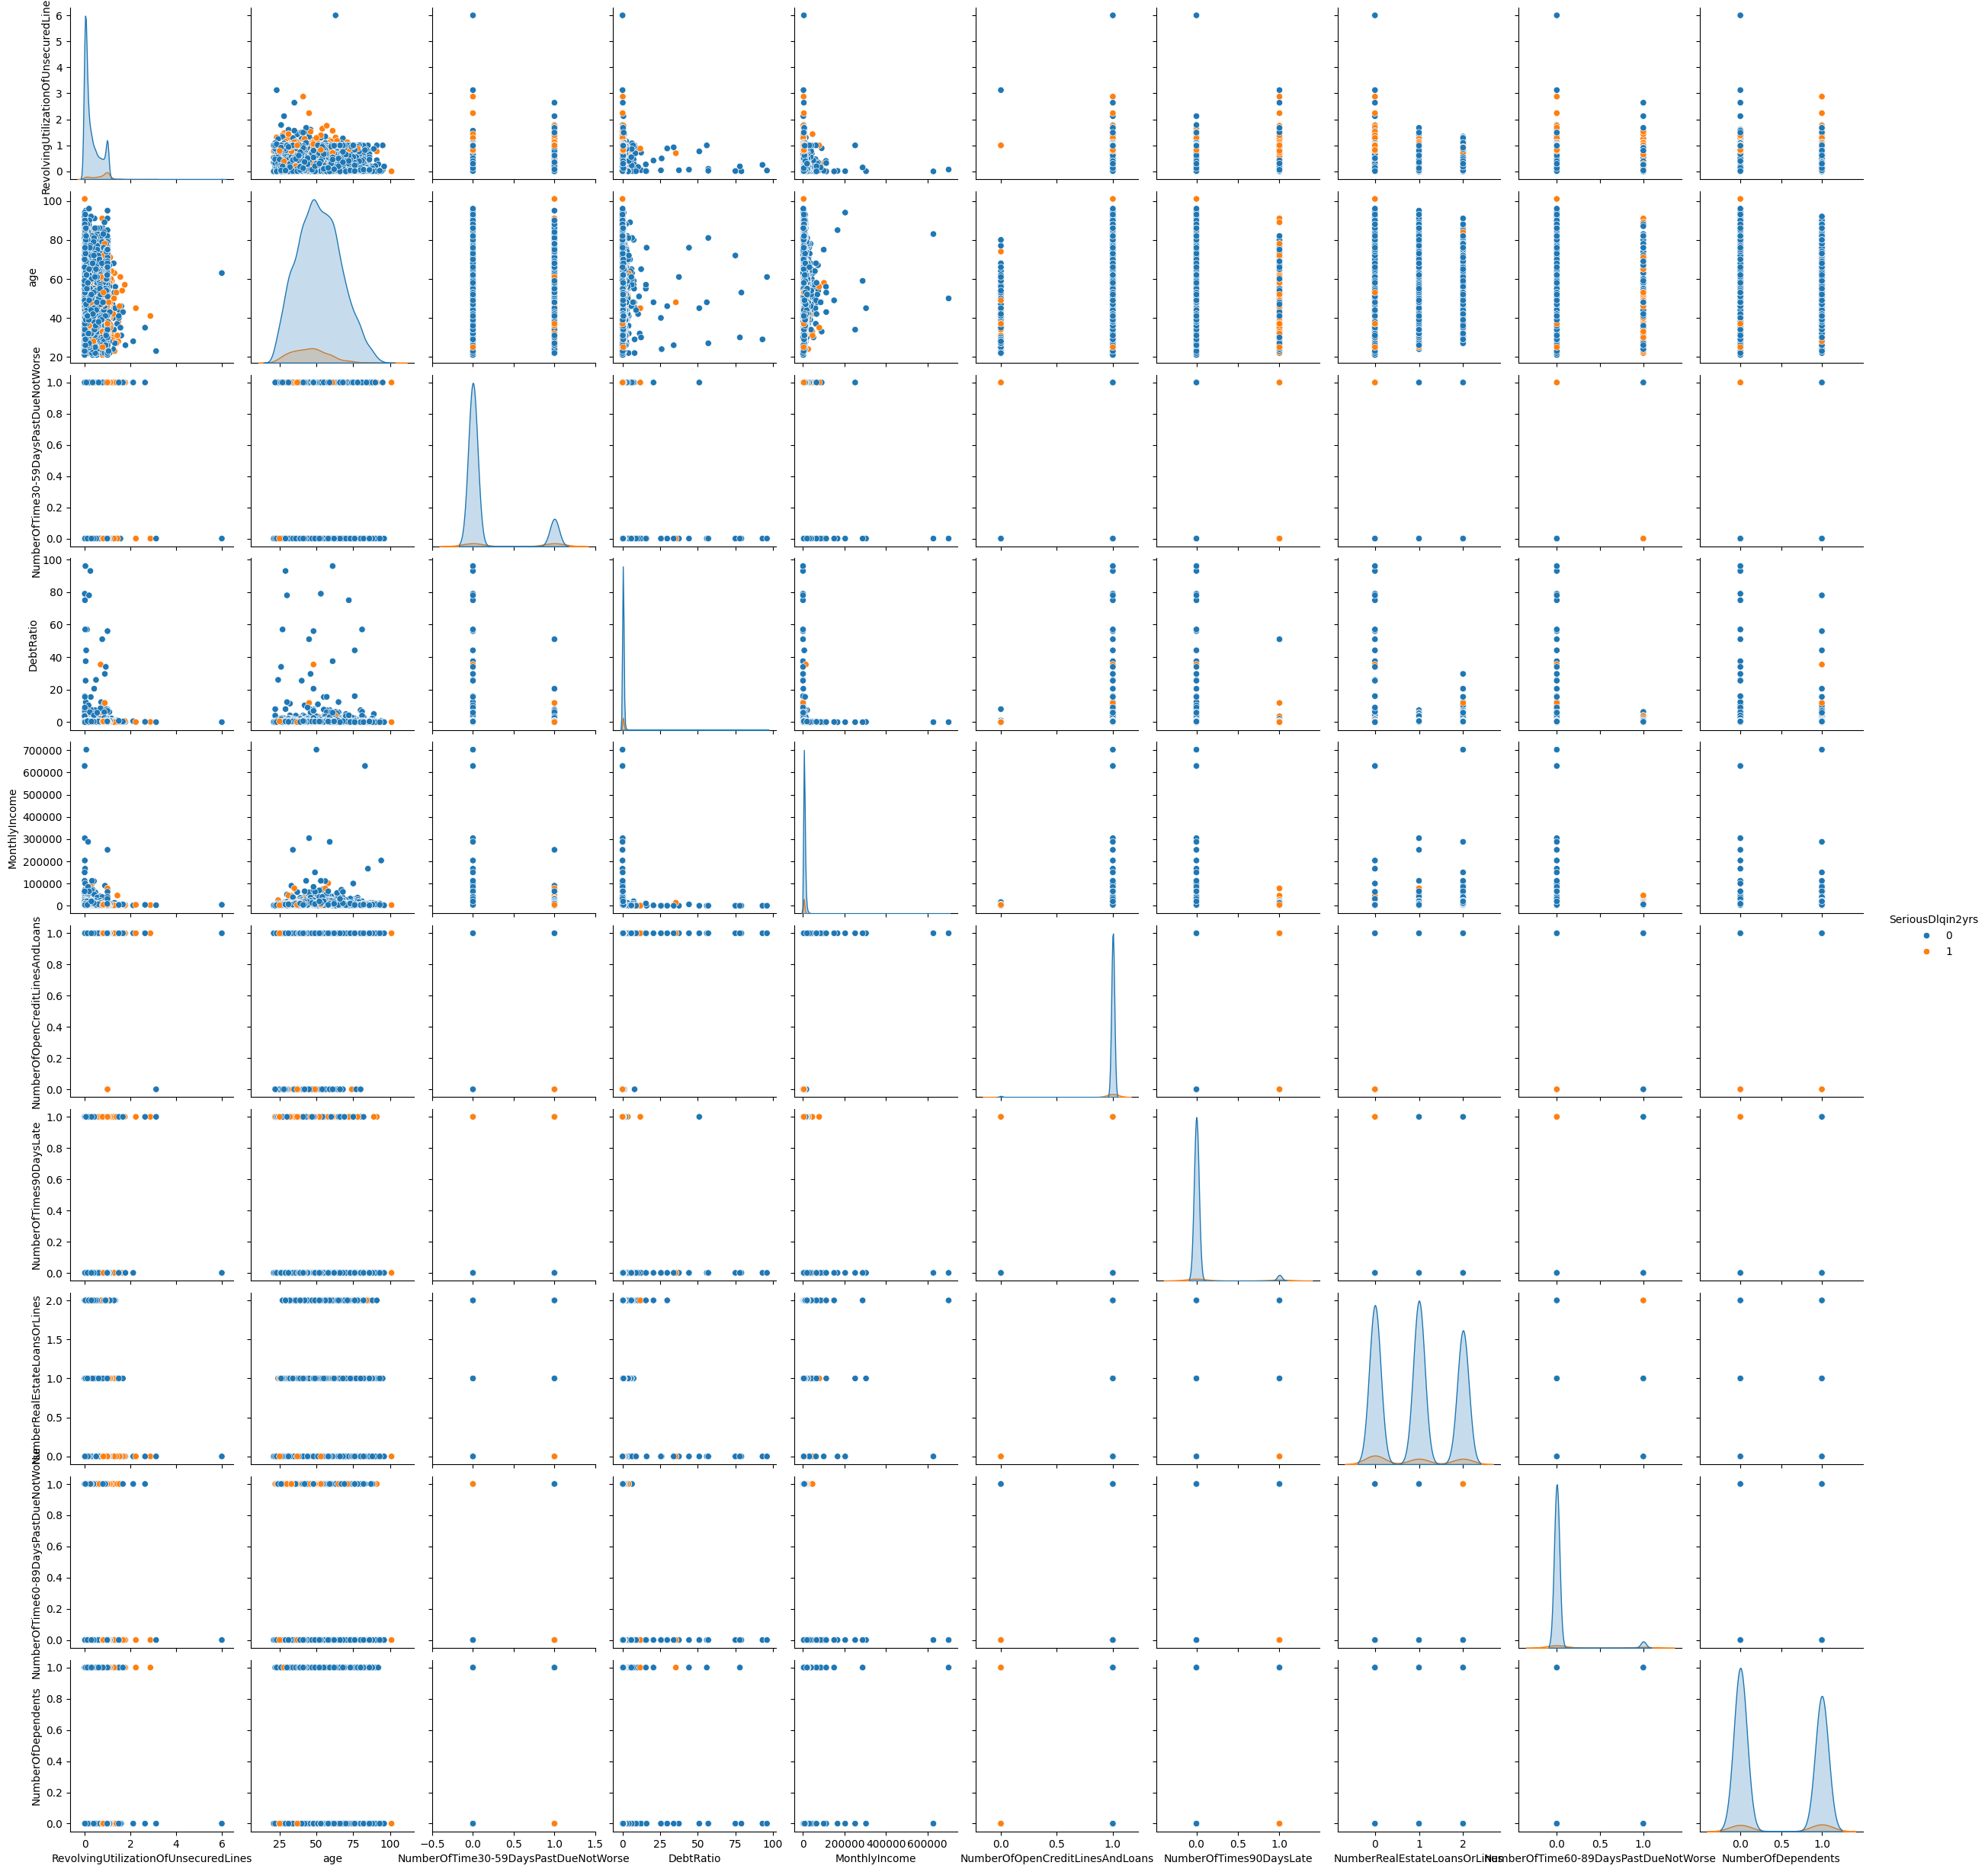

In [39]:
sns.pairplot(train_set, hue = target)

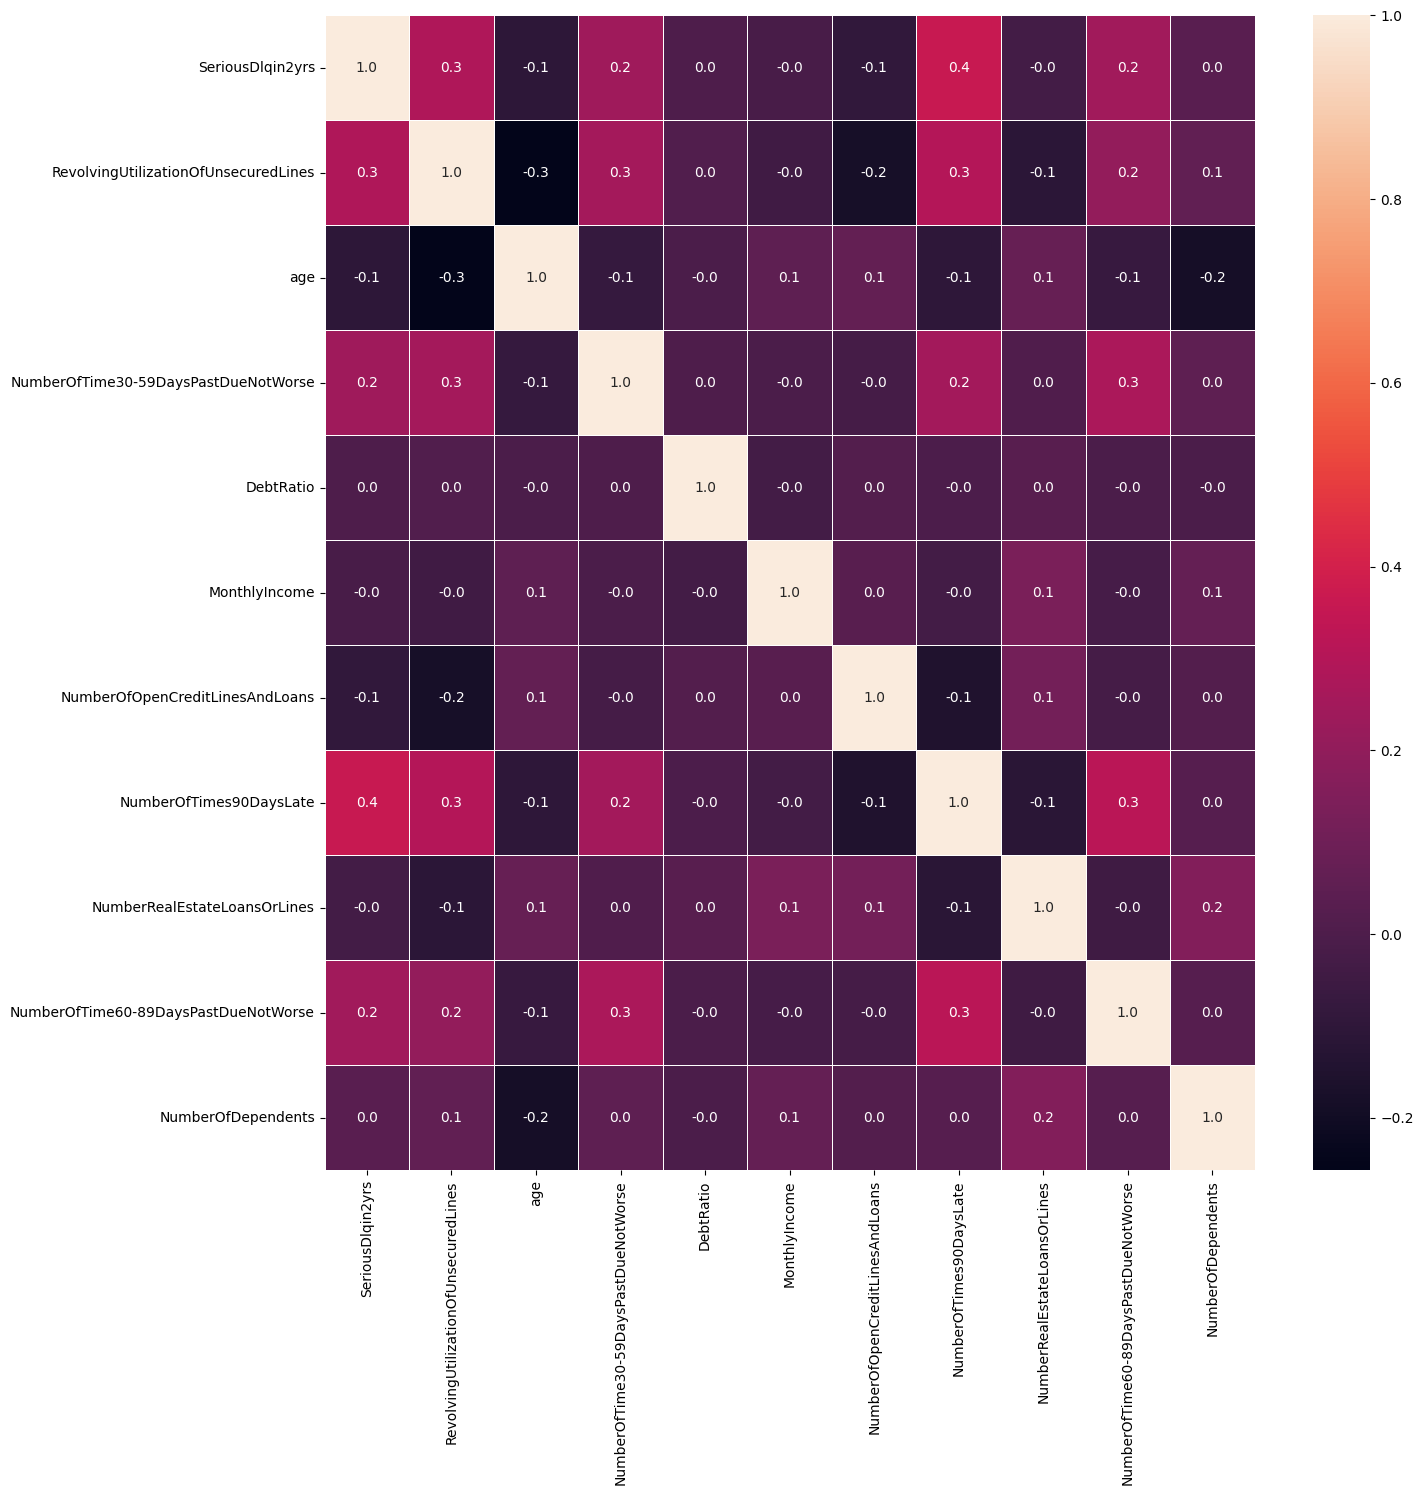

In [38]:
#correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(train_set.corr(numeric_only=True), annot=True, linewidths=.5, fmt= '.1f');

In [40]:
import numpy as np
corr= train_set[col_num].corr()
serie_corr = np.abs(corr[target])
serie_corr.sort_values(ascending = False)

SeriousDlqin2yrs                        1.000000
NumberOfTimes90DaysLate                 0.358480
RevolvingUtilizationOfUnsecuredLines    0.284084
NumberOfTime60-89DaysPastDueNotWorse    0.246382
NumberOfTime30-59DaysPastDueNotWorse    0.241122
age                                     0.107801
NumberOfOpenCreditLinesAndLoans         0.090652
NumberOfDependents                      0.034496
NumberRealEstateLoansOrLines            0.034261
MonthlyIncome                           0.018163
DebtRatio                               0.001863
Name: SeriousDlqin2yrs, dtype: float64

In [83]:
r_minimo = 0.10
features_num_sel = serie_corr[serie_corr >= r_minimo].index.to_list()
# Eliminar la columna 'SeriousDlqin2yrs'
df.drop('SeriousDlqin2yrs', axis=1, inplace=True)


In [103]:
features_num_sel

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [58]:
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]

X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

In [57]:
from sklearn.feature_selection import VarianceThreshold

umbral_varianza = 0.5

var_selector = VarianceThreshold(umbral_varianza)
var_selector.fit(X_train)
print("Lista seleccionada para selector de Varianza", var_selector.get_feature_names_out())

Lista seleccionada para selector de Varianza ['age' 'DebtRatio' 'MonthlyIncome' 'NumberRealEstateLoansOrLines']


In [65]:
selected_features_variance =  var_selector.get_feature_names_out().tolist()
print(selected_features_variance)

['age', 'DebtRatio', 'MonthlyIncome', 'NumberRealEstateLoansOrLines']


    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 


In [46]:
# Encontrar las 5 mejores características
num_feats_anova = 5
select_feature = SelectKBest(f_classif, k=num_feats_anova).fit(X_train, y_train)


In [47]:
best_features_sorted = pd.DataFrame({'Feature': X_train.columns, 'Score': select_feature.scores_}).sort_values(by='Score', ascending=False)
features_anova = select_feature.get_feature_names_out()
best_features_sorted.head()

,Feature,Score
6,NumberOfTimes90DaysLate,1393.472609
0,RevolvingUtilizationOfUnsecuredLines,829.602605
8,NumberOfTime60-89DaysPastDueNotWorse,610.725627
2,NumberOfTime30-59DaysPastDueNotWorse,583.336375
1,age,111.110548


También pide mutual information

In [ ]:
features_cat
for col in features_cat:
    print(f"MI({col};{target}):", mutual_info_score(train_set[col],train_set[target]))

features_filter += features_cat

    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)


In [50]:
from sklearn.feature_selection import SelectFromModel
rfc = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)


selector_model = SelectFromModel(estimator = rfc, threshold= "median") 
selector_model.fit(X_train,y_train)
print("Escogidas:", selector_model.get_feature_names_out())

Escogidas: ['RevolvingUtilizationOfUnsecuredLines'
 'NumberOfTime30-59DaysPastDueNotWorse' 'DebtRatio'
 'NumberOfTimes90DaysLate' 'NumberOfTime60-89DaysPastDueNotWorse']


In [63]:
selected_features_select = selector_model.get_feature_names_out().tolist()

    4. Selección de las mejores features empleando RFE.


In [106]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

features= col_num +col_cat

# Inicializar el modelo
rf_RFE = RandomForestClassifier(random_state=42,class_weight="balanced") #importante poner el balance

# Inicializar RFE con el modelo
rfe = RFE(estimator=rf_RFE, n_features_to_select=5, step=1)

# Ajustar RFE a los datos de entrenamiento
#rfe.fit(X_train, y_train)
rfe.fit(train_set[features], train_set[target]) #según corrección

# Crear un DataFrame con los rankings de las características
ranking_df = pd.DataFrame(rfe.ranking_, columns=["ranking"], index=col_num)

# Filtrar características con ranking 1
selected_features = ranking_df[ranking_df["ranking"] == 1].index.tolist()

# Mostrar la lista de características seleccionadas
print("Características seleccionadas:", selected_features)


Características seleccionadas: ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']


    5. Selección de las mejores features empleando SFS.


In [62]:
from sklearn.feature_selection import SequentialFeatureSelector

rf_SFS = RandomForestClassifier(random_state = 42)

sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 5,
                                        cv = 4,
                                        scoring = "balanced_accuracy")


sfs_forward.fit(X_train, y_train)
selected_features_SFS = sfs_forward.get_feature_names_out().tolist()
_

print("Elegidasd SFS:", sfs_forward.get_feature_names_out())


Elegidasd SFS: ['RevolvingUtilizationOfUnsecuredLines' 'DebtRatio'
 'NumberOfOpenCreditLinesAndLoans' 'NumberOfTimes90DaysLate'
 'NumberOfDependents']


In [73]:
selected_features_SFS = sfs_forward.get_feature_names_out().tolist()
selected_features_SFS

['RevolvingUtilizationOfUnsecuredLines',
 'DebtRatio',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberOfDependents']

    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.


In [75]:
from collections import Counter

# Listas extraídas de la imagen
lista1 = ['age', 'DebtRatio', 'MonthlyIncome', 'NumberRealEstateLoansOrLines']
lista2 = ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']
lista3 = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberOfDependents']
lista4 = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']
lista5 = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberOfDependents']

# Combinar todas las listas en una sola
todas_las_listas = lista1 + lista2 + lista3 + lista4 + lista5

# Contar las ocurrencias de cada valor
contador = Counter(todas_las_listas)

# Obtener las 6 características que más se repiten
caracteristicas_mas_repetidas = contador.most_common(6)

# Mostrar el resultado
print("Las 6 características que más se repiten son:")
for feature, count in caracteristicas_mas_repetidas:
    print(f"{feature}: {count}")


Las 6 características que más se repiten son:
RevolvingUtilizationOfUnsecuredLines: 4
NumberOfTimes90DaysLate: 4
age: 3
DebtRatio: 3
NumberOfTime30-59DaysPastDueNotWorse: 2
NumberOfTime60-89DaysPastDueNotWorse: 2


In [76]:
# Extraer solo los nombres de las características en una lista
lista_caracteristicas_mas_repetidas = [feature for feature, count in caracteristicas_mas_repetidas]

# Mostrar la lista de características más repetidas
print("Las 6 características que más se repiten son:", lista_caracteristicas_mas_repetidas)

Las 6 características que más se repiten son: ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate', 'age', 'DebtRatio', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse']



3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.



In [95]:
# Supongamos que deseas eliminar la columna 'SeriousDlqin2yrs'
column_to_remove = 'SeriousDlqin2yrs'
features_num_sel = [col for col in features_num_sel if col != column_to_remove]


In [96]:
features_num_sel


['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer, recall_score

# Filtrar las características seleccionadas en X_train para cada lista
X_train_selected_SFS = X_train[selected_features_SFS]
X_train_selected_features = X_train[selected_features]
X_train_selected_select = X_train[selected_features_select]
X_train_selected_anova = X_train[features_anova]
X_train_selected_variance = X_train[selected_features_variance]
X_train_selected_num_sel = X_train[features_num_sel]

# Definir los modelos
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lgbm_model = LGBMClassifier(random_state=42)

# Lista de modelos
modelos = [rf_model, lr_model, lgbm_model]

# Realizar validación cruzada y calcular la métrica de evaluación (recall) para cada lista
resultados = {}

for modelo in modelos:
    nombre_modelo = modelo.__class__.__name__
    recall_scores_SFS = cross_val_score(modelo, X_train_selected_SFS, y_train, cv=6, scoring=make_scorer(recall_score, average='macro'))
    recall_scores_select = cross_val_score(modelo, X_train_selected_select, y_train, cv=6, scoring=make_scorer(recall_score, average='macro'))
    recall_scores_anova = cross_val_score(modelo, X_train_selected_anova, y_train, cv=6, scoring=make_scorer(recall_score, average='macro'))
    recall_scores_variance = cross_val_score(modelo, X_train_selected_variance, y_train, cv=6, scoring=make_scorer(recall_score, average='macro'))
    recall_scores_num_sel = cross_val_score(modelo, X_train_selected_num_sel, y_train, cv=6, scoring=make_scorer(recall_score, average='macro'))
    
    resultados[nombre_modelo] = {
        'SFS': recall_scores_SFS.mean(),
        'select': recall_scores_select.mean(),
        'anova': recall_scores_anova.mean(),
        'variance': recall_scores_variance.mean(),
        'num_sel': recall_scores_num_sel.mean()
    }

# Seleccionar el mejor modelo para cada lista basado en la media del recall
mejor_modelo_SFS = max(resultados, key=lambda k: resultados[k]['SFS'])
mejor_modelo_select = max(resultados, key=lambda k: resultados[k]['select'])
mejor_modelo_anova = max(resultados, key=lambda k: resultados[k]['anova'])
mejor_modelo_variance = max(resultados, key=lambda k: resultados[k]['variance'])
mejor_modelo_num_sel = max(resultados, key=lambda k: resultados[k]['num_sel'])

print(f"\nEl mejor modelo para selected_features_SFS es: {mejor_modelo_SFS} con un recall medio de {resultados[mejor_modelo_SFS]['SFS']}")
print(f"El mejor modelo para selected_features_select es: {mejor_modelo_select} con un recall medio de {resultados[mejor_modelo_select]['select']}")
print(f"El mejor modelo para features_anova es: {mejor_modelo_anova} con un recall medio de {resultados[mejor_modelo_anova]['anova']}")
print(f"El mejor modelo para selected_features_variance es: {mejor_modelo_variance} con un recall medio de {resultados[mejor_modelo_variance]['variance']}")
print(f"El mejor modelo para features_num_sel es: {mejor_modelo_num_sel} con un recall medio de {resultados[mejor_modelo_num_sel]['num_sel']}")


[LightGBM] [Info] Number of positive: 552, number of negative: 7324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 516
[LightGBM] [Info] Number of data points in the train set: 7876, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.070086 -> initscore=-2.585364
[LightGBM] [Info] Start training from score -2.585364
[LightGBM] [Info] Number of positive: 552, number of negative: 7324
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 516
[LightGBM] [Info] Number of data points in the train set: 7876, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.070086 -> initscore=-2.585364
[LightGBM] [In

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [99]:
#El mejor modelo para features_num_sel es: RandomForestClassifier con un recall medio de 0.5911310693587032
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo de Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Definir la cuadrícula de hiperparámetros
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "max_features": ["sqrt", "log2", None],
    "class_weight": ["balanced", None]
}

# Realizar la búsqueda en cuadrícula
rf_grid = GridSearchCV(rf_clf, param_grid=param_grid, cv=5, scoring="balanced_accuracy")
rf_grid.fit(train_set[features_num_sel], y_train)

# Obtener los mejores hiperparámetros
best_params = rf_grid.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar el modelo con los mejores hiperparámetros
best_rf_model = rf_grid.best_estimator_
best_rf_model.fit(train_set[features_num_sel], y_train)


Mejores hiperparámetros: {'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}


RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=10, random_state=42)

In [108]:
features_num_sel

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [102]:
# Preparación del conjunto de prueba
X_test = test_set[features_num_sel]
y_test = test_set[target]

# Predicción con el mejor modelo
y_pred = rf_grid.best_estimator_.predict(X_test)

# Informe de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.76      0.86      2197
           1       0.19      0.73      0.30       167

    accuracy                           0.76      2364
   macro avg       0.58      0.75      0.58      2364
weighted avg       0.92      0.76      0.82      2364



### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.

Ganamos puntos en recall con PCA y perdemos explicabilidad

In [121]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Centrar y escalar los datos
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_scaled = scaler.fit_transform(X_train)

# Crear una instancia de PCA con el número deseado de componentes
n_components = 5  # Ajusta este valor según tus necesidades
pca = PCA(n_components=n_components)

# Ajustar el modelo PCA a los datos escalados
X_train_pca = pca.fit_transform(X_train_scaled)

# Crear un nuevo DataFrame con los componentes principales
columns_pca = [f"PC{i+1}" for i in range(n_components)]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=columns_pca)

# Entrenar un modelo Random Forest con los datos reducidos
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca_df, y_train)

# Transformar los datos de prueba utilizando el mismo PCA
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=columns_pca)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test_pca_df)

# Evaluar el modelo
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))


Informe de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2197
           1       0.85      0.81      0.83       167

    accuracy                           0.98      2364
   macro avg       0.92      0.90      0.91      2364
weighted avg       0.98      0.98      0.98      2364

